In [1]:
import pandas as pd

In [11]:
winning_df = pd.read_excel("../data/Winning-members.xlsx", index_col="ons_id")
lost_df = pd.read_excel("../data/Defeated-MPs.xlsx", index_col="ons_id", usecols=["ons_id", "party_name", "firstname", "middlenames", "surname", "gender"])

In [12]:
print(winning_df.shape)
winning_df.head()

(650, 15)


,constituency_name,region_name,country_name,constituency_type,result,party_abbreviation,party_name,title,firstname,surname,middlenames,mnis_id,gender,candidate_type,old_constituency
ons_id,,,,,,,,,,,,,,,
W07000081,Aberafan Maesteg,Wales,Wales,County,Lab hold,Lab,Labour,NaN,Stephen,Kinnock,NaN,4359.0,Male,Re-elected Member,Aberavon
E14001259,Hackney North and Stoke Newington,London,England,Borough,Lab hold,Lab,Labour,Ms,Diane,Abbott,NaN,172.0,Female,Re-elected Member,Hackney North and Stoke Newington
S14000060,Aberdeen North,Scotland,Scotland,Borough,SNP hold,SNP,Scottish National Party,NaN,Kirsty,Blackman,Ann,4357.0,Female,Re-elected Member,Aberdeen North
E14001415,Oldham East and Saddleworth,North West,England,County,Lab hold,Lab,Labour,NaN,Debbie,Abrahams,Angela Elspeth Marie,4212.0,Female,Re-elected Member,Oldham East and Saddleworth
S14000061,Aberdeen South,Scotland,Scotland,Borough,SNP hold,SNP,Scottish National Party,NaN,Stephen,Flynn,Mark,4735.0,Male,Re-elected Member,Aberdeen South


In [13]:
print(lost_df.shape)
lost_df.head()

(218, 5)


,party_name,firstname,surname,middlenames,gender
ons_id,,,,,
S14000062,Conservative,Douglas,Ross,Gordon,Male
S14000063,Scottish National Party,Anum,Qaisar,NaN,Female
E14001063,Conservative,Leo,Docherty,NaN,Male
S14000064,Alba Party,Kenny,MacAskill,Wright,Male
S14000064,Scottish National Party,John,Nicolson,MacKenzie,Male


In [17]:
df = winning_df.join(lost_df, on="ons_id", rsuffix="_lost")

In [19]:
df.head()

,constituency_name,region_name,country_name,constituency_type,result,party_abbreviation,party_name,title,firstname,surname,middlenames,mnis_id,gender,candidate_type,old_constituency,party_name_lost,firstname_lost,surname_lost,middlenames_lost,gender_lost
ons_id,,,,,,,,,,,,,,,,,,,,
W07000081,Aberafan Maesteg,Wales,Wales,County,Lab hold,Lab,Labour,NaN,Stephen,Kinnock,NaN,4359.0,Male,Re-elected Member,Aberavon,NaN,NaN,NaN,NaN,NaN
E14001259,Hackney North and Stoke Newington,London,England,Borough,Lab hold,Lab,Labour,Ms,Diane,Abbott,NaN,172.0,Female,Re-elected Member,Hackney North and Stoke Newington,NaN,NaN,NaN,NaN,NaN
S14000060,Aberdeen North,Scotland,Scotland,Borough,SNP hold,SNP,Scottish National Party,NaN,Kirsty,Blackman,Ann,4357.0,Female,Re-elected Member,Aberdeen North,NaN,NaN,NaN,NaN,NaN
E14001415,Oldham East and Saddleworth,North West,England,County,Lab hold,Lab,Labour,NaN,Debbie,Abrahams,Angela Elspeth Marie,4212.0,Female,Re-elected Member,Oldham East and Saddleworth,NaN,NaN,NaN,NaN,NaN
S14000061,Aberdeen South,Scotland,Scotland,Borough,SNP hold,SNP,Scottish National Party,NaN,Stephen,Flynn,Mark,4735.0,Male,Re-elected Member,Aberdeen South,NaN,NaN,NaN,NaN,NaN


### Which party won the greatest number of seats in each region? Which party lost the greatest number of seats?

In [18]:
df.pivot_table(index="party_name", columns="region_name", values="country_name", aggfunc="count").idxmax()

region_name
East Midlands                     Labour
East of England             Conservative
London                            Labour
North East                        Labour
North West                        Labour
Northern Ireland               Sinn Fein
Scotland                          Labour
South East                        Labour
South West                        Labour
Wales                             Labour
West Midlands                     Labour
Yorkshire and The Humber          Labour
dtype: object

In [20]:
df.pivot_table(index="party_name_lost", columns="region_name", values="country_name", aggfunc="count").idxmax()

region_name
East Midlands                            Conservative
East of England                          Conservative
London                                   Conservative
North East                               Conservative
North West                               Conservative
Northern Ireland            Democratic Unionist Party
Scotland                      Scottish National Party
South East                               Conservative
South West                               Conservative
Wales                                    Conservative
West Midlands                            Conservative
Yorkshire and The Humber                 Conservative
dtype: object

### Pie chart showing how many seats were won by each party

<Axes: ylabel='count'>

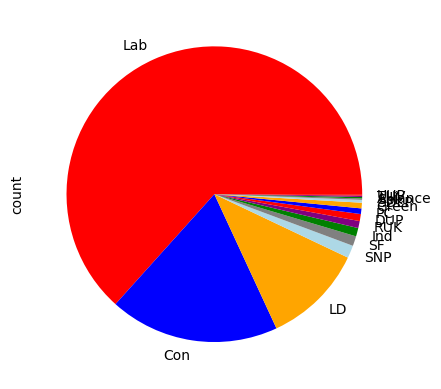

In [24]:
df["party_abbreviation"].value_counts().plot.pie(colors=["red", "blue", "orange", "lightblue", "gray", "green", "purple"])

In [25]:
df["party_abbreviation"].value_counts()

party_abbreviation
Lab         413
Con         121
LD           72
SNP           9
SF            7
Ind           6
RUK           5
DUP           5
PC            4
Green         4
SDLP          2
Spk           1
Alliance      1
TUV           1
UUP           1
Name: count, dtype: int64

### What is the proportion of women in the incoming parliament? In how many races did a female candidate beat a male candidate and vice versa?

In [27]:
df["gender"].value_counts(normalize=True)

gender
Male      0.595092
Female    0.404908
Name: proportion, dtype: float64

In [34]:
((df["gender"] == "Female") & (df["gender_lost"] == "Male")).sum()

59

In [35]:
((df["gender"] == "Male") & (df["gender_lost"] == "Female")).sum()

37

### How many members of parliament have the title of "Sir" of "Dame", and how many of them are from each party?

In [43]:
df.loc[df["title"].isin(["Sir", "Dame"]), "party_name"].value_counts()

party_name
Conservative               14
Labour                      7
Labour and Co-operative     2
Speaker                     1
Name: count, dtype: int64